# Sorting Audio Clips

In this notebook we will sort a dataset of short audio files based on their sonic similarity. The dataset we will be using is the set of audio files for the [International Phonetic Association handbook](https://www.internationalphoneticassociation.org/content/ipa-handbook-downloads) - a set of spoken words in 27 different languages. As an exercise we will use HTMLSession to download and unzip the files automatically, but we could also manually do this.

We start by requesting the URL below and catching the response.

In [2]:
from requests_html import HTMLSession

session = HTMLSession()

response = session.get('https://www.internationalphoneticassociation.org/content/ipa-handbook-downloads')

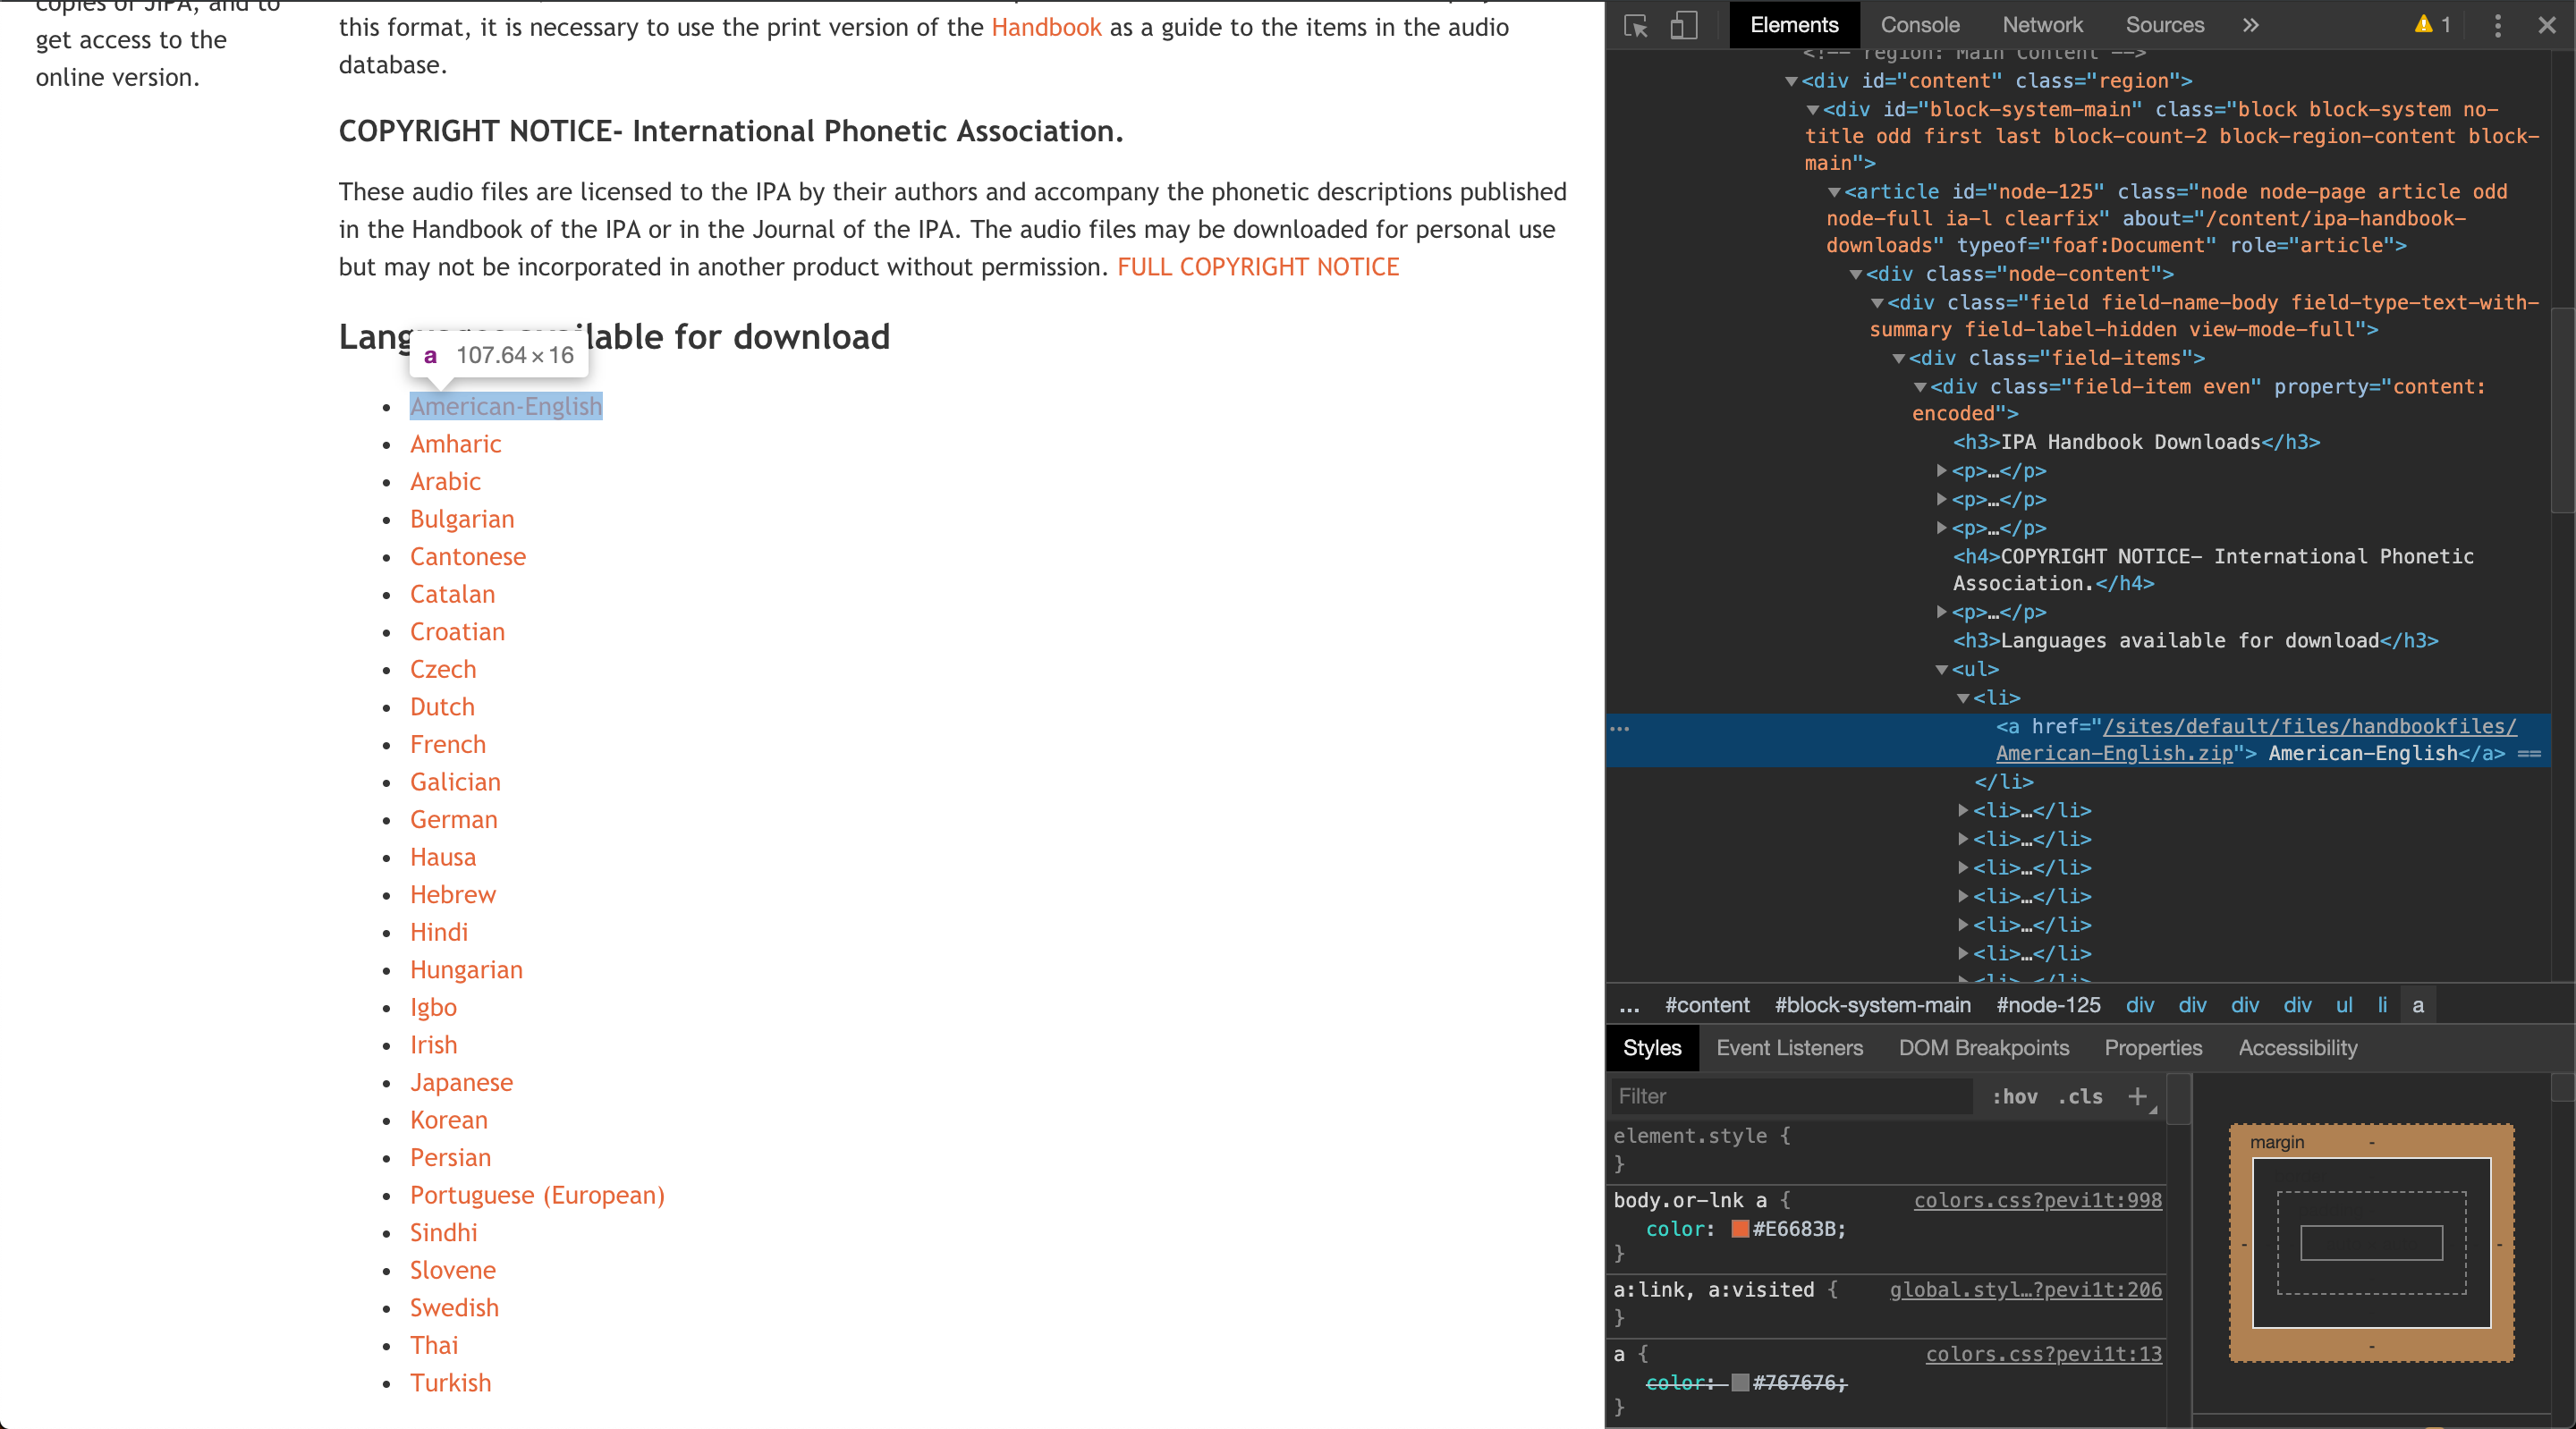

Looking at the page, we can see that the links we want to download are `<a>` tags nested within a class named `.field-item`. We can use css selectors to write a one line selector (more [here](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors)). Specifically, we use the `:nth-of-type()` selector to select just the first `<ul>`, since the second one contains links to pdf corrections.

This gives us our list of `<a>` tags, but we now need to get the `href` attribute from the a tag in order to download. We can use a quick list comprehension to sort that out and create our `zip_links` list.

In [8]:
zip_files = response.html.find(".field-item ul:nth-of-type(1) a")
zip_links = [href.attrs.get('href') for href in zip_files]

We need to make a folder to hold our files in. One nice trick with jupyter notebooks is the ability to run shell commands. Simply prefix the command with an exclamation point - this should create a folder in the root of your jupyter notebook named "phonemes".

In [10]:
! mkdir ./phonemes

Now we use urllib to download our zip links. The URLS we retrieved earlier are relative, so we need to prefix the url with the correct domain.

In [20]:
import urllib.request

for link in zip_links:
    file_name = link.split('/')[-1]
    download_url = 'https://www.internationalphoneticassociation.org' + link
    urllib.request.urlretrieve(download_url, './phonemes/' + file_name)
    print('Finished downloading ' + file_name)

Finished downloading American-English.zip
Finished downloading Amharic.zip
Finished downloading Arabic.zip
Finished downloading Bulgarian.zip
Finished downloading Cantonese.zip
Finished downloading Catalan.zip
Finished downloading Croatian.zip
Finished downloading Czech.zip
Finished downloading Dutch.zip
Finished downloading French.zip
Finished downloading Galician.zip
Finished downloading German.zip
Finished downloading Hausa.zip
Finished downloading Hebrew.zip
Finished downloading Hindi.zip
Finished downloading Hungarian.zip
Finished downloading Igbo.zip
Finished downloading Irish.zip
Finished downloading Japanese.zip
Finished downloading Korean.zip
Finished downloading Persian.zip
Finished downloading Portuguese.zip
Finished downloading Sindhi.zip
Finished downloading Slovene.zip
Finished downloading Swedish.zip
Finished downloading Thai.zip
Finished downloading Turkish.zip


Using zipfile, we unzip the files and put them in their own folders.

In [22]:
import zipfile


for link in zip_links:
    file_name = link.split('/')[-1]

    with zipfile.ZipFile('./phonemes/' + file_name, 'r') as zip_ref:
        zip_ref.extractall('./phonemes/' + file_name.replace('.zip', ''))


Take a look through the files. The process we are applying to sort these files only works for sounds that are a maximum of a couple seconds in length. We can see that the consonants, vowels, and tones folders nested within each project match this requirement, while the other folders tend to contain much longer phrases. We'll work with just the constonants, vowels, and tones for now.

As always, we can use glob to get a listing of all the files we need. Since files are nested unpredictably, we can use wildcard selectors for directories and filenames and set the `recursive=True` flag in order to get around this. We then use the python `extend` functionality to combine all of these lists into one list.

In [10]:
import glob

consonants = glob.glob('./phonemes/**/Consonants/**/*.wav', recursive=True)
vowels = glob.glob('./phonemes/**/Vowels/**/*.wav', recursive=True)
tones = glob.glob('./phonemes/**/Tones/**/*.wav', recursive=True)

files_combined = []
files_combined.extend(consonants)
files_combined.extend(vowels)
files_combined.extend(tones)

## Processing our audio files

The next step is to process our audio files. We'll be using [LibROSA](https://librosa.github.io/librosa/) - an excellent Python library for audio analysis. 

We'll be loading our samples as numpy arrays, with each point in the array representing one sample of sound. `librosa.load()` returns this array, along with the sample rate `sr` that the file is loaded with.

In [14]:
import numpy as np
import librosa

samples = []
for index, file in enumerate(files_combined):
    y, sr = librosa.load(file)
    samples.append(y)
    print("Processed sample number " + str(index))

Processed sample number 0
Processed sample number 1
Processed sample number 2
Processed sample number 3
Processed sample number 4
Processed sample number 5
Processed sample number 6
Processed sample number 7
Processed sample number 8
Processed sample number 9
Processed sample number 10
Processed sample number 11
Processed sample number 12
Processed sample number 13
Processed sample number 14
Processed sample number 15
Processed sample number 16
Processed sample number 17
Processed sample number 18
Processed sample number 19
Processed sample number 20
Processed sample number 21
Processed sample number 22
Processed sample number 23
Processed sample number 24
Processed sample number 25
Processed sample number 26
Processed sample number 27
Processed sample number 28
Processed sample number 29
Processed sample number 30
Processed sample number 31
Processed sample number 32
Processed sample number 33
Processed sample number 34
Processed sample number 35
Processed sample number 36
Processed s

Processed sample number 305
Processed sample number 306
Processed sample number 307
Processed sample number 308
Processed sample number 309
Processed sample number 310
Processed sample number 311
Processed sample number 312
Processed sample number 313
Processed sample number 314
Processed sample number 315
Processed sample number 316
Processed sample number 317
Processed sample number 318
Processed sample number 319
Processed sample number 320
Processed sample number 321
Processed sample number 322
Processed sample number 323
Processed sample number 324
Processed sample number 325
Processed sample number 326
Processed sample number 327
Processed sample number 328
Processed sample number 329
Processed sample number 330
Processed sample number 331
Processed sample number 332
Processed sample number 333
Processed sample number 334
Processed sample number 335
Processed sample number 336
Processed sample number 337
Processed sample number 338
Processed sample number 339
Processed sample num

Processed sample number 600
Processed sample number 601
Processed sample number 602
Processed sample number 603
Processed sample number 604
Processed sample number 605
Processed sample number 606
Processed sample number 607
Processed sample number 608
Processed sample number 609
Processed sample number 610
Processed sample number 611
Processed sample number 612
Processed sample number 613
Processed sample number 614
Processed sample number 615
Processed sample number 616
Processed sample number 617
Processed sample number 618
Processed sample number 619
Processed sample number 620
Processed sample number 621
Processed sample number 622
Processed sample number 623
Processed sample number 624
Processed sample number 625
Processed sample number 626
Processed sample number 627
Processed sample number 628
Processed sample number 629
Processed sample number 630
Processed sample number 631
Processed sample number 632
Processed sample number 633
Processed sample number 634
Processed sample num

Processed sample number 904
Processed sample number 905
Processed sample number 906
Processed sample number 907
Processed sample number 908
Processed sample number 909
Processed sample number 910
Processed sample number 911
Processed sample number 912
Processed sample number 913
Processed sample number 914
Processed sample number 915
Processed sample number 916
Processed sample number 917
Processed sample number 918
Processed sample number 919
Processed sample number 920
Processed sample number 921
Processed sample number 922
Processed sample number 923
Processed sample number 924
Processed sample number 925
Processed sample number 926
Processed sample number 927
Processed sample number 928
Processed sample number 929
Processed sample number 930
Processed sample number 931
Processed sample number 932
Processed sample number 933
Processed sample number 934
Processed sample number 935
Processed sample number 936
Processed sample number 937
Processed sample number 938
Processed sample num

Next we need to generate spectrograms from our samples. These spectrograms will be the feature vectors we use to sort our samples. This code is based off the [set of audio notebooks by Kyle Mcdonald](https://github.com/kylemcdonald/AudioNotebooks/blob/master/Samples%20to%20Fingerprints.ipynb)

In [15]:
from skimage.measure import block_reduce

n_fft = 512 # this is recommended for speech processing, but 1024 could work for other samples
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 128 # limit how many time steps to use

fingerprints = []
for sample in samples:
    S = librosa.stft(sample, n_fft=n_fft, hop_length=int(n_fft/4))
    amp = np.abs(S)
    amp = block_reduce(amp, (10, 1), func=np.mean) # block reduce to limit the amount of data
    if amp.max() > 0:
        amp /= amp.max()
    if amp.shape[1] < crop_cols: # if sample is smaller than crop size, pad with zeros
        amp = np.pad(amp, ((0, 0), (0, crop_cols-amp.shape[1])), 'constant')
    amp = amp[:crop_rows, :crop_cols] # if sample is larger than crop size this will crop
    fingerprints.append(amp)

Plotting the spectrograms below, we can see the block reduction in action

In [16]:
import matplotlib.pyplot as plt
import librosa.display

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.tight_layout()
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(amp, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/site-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Next we use `np.hstack` to flatten our feature arrays into a 1d array, and then run our standard clustering and kmeans process to find the most representative sounds in each cluster.

In [17]:
flattened = [np.hstack(fingerprint) for fingerprint in fingerprints]

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(flattened)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(scaled)

In [20]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5, metric='cosine').fit(scaled)
_, closest = neighbors.kneighbors(kmeans.cluster_centers_)

Now that we have our clusters, we can hear what they sound like using the build in `IPython.display` feature.

In [21]:
from IPython.display import Audio
from IPython.display import display

for index, cluster_row in enumerate(closest):
    print('\n\nCluster number ' + str(index) + '\n\n')
    for col in cluster_row:
        name = files_combined[col]
        print(name)
        display(Audio(name))



Cluster number 0


./phonemes/Hungarian/Hungarian/Vowels/shoot.wav


./phonemes/Hungarian/Hungarian/Consonants/horse.wav


./phonemes/Hungarian/Hungarian/Consonants/no.wav


./phonemes/Galician/GALICIAN/Consonants/language.wav


./phonemes/Hungarian/Hungarian/Consonants/cut.wav




Cluster number 1


./phonemes/Dutch/Dutch/Vowels/conservatory.wav


./phonemes/Cantonese/Cantonese/Tones/time.wav


./phonemes/Sindhi/Sindhi/Vowels/walks-n.wav


./phonemes/Sindhi/Sindhi/Vowels/jealousy.wav


./phonemes/Dutch/Dutch/Consonants/sock.wav




Cluster number 2


./phonemes/Igbo/Igbo/Vowels/dissect.wav


./phonemes/Igbo/Igbo/Consonants/war.wav


./phonemes/Igbo/Igbo/Vowels/children.wav


./phonemes/Hindi/Hindi/Consonants/platter.wav


./phonemes/Igbo/Igbo/Consonants/sand.wav




Cluster number 3


./phonemes/Arabic/ARABIC/Consonants/dispute.wav


./phonemes/Czech/Czech/Consonants/woman.wav


./phonemes/Czech/Czech/Consonants/river.wav


./phonemes/Irish/Irish/Consonants/Paorach-name.wav


./phonemes/Arabic/ARABIC/Consonants/walked.wav




Cluster number 4


./phonemes/Croatian/CROATIAN/Consonants/nose.wav


./phonemes/Croatian/CROATIAN/Consonants/guest.wav


./phonemes/Irish/Irish/Consonants/Consonant-quality/boat-gen-sg.wav


./phonemes/Irish/Irish/Consonants/Consonant-quality/boat-nom-sg.wav


./phonemes/Dutch/Dutch/Consonants/bicycle.wav




Cluster number 5


./phonemes/Igbo/Igbo/Vowels/head.wav


./phonemes/Czech/Czech/Consonants/clean.wav


./phonemes/Igbo/Igbo/Consonants/fly.wav


./phonemes/Arabic/ARABIC/Vowels/eye.wav


./phonemes/Igbo/Igbo/Consonants/resemble.wav




Cluster number 6


./phonemes/Irish/Irish/Consonants/Consonant-quality/boat-gen-sg.wav


./phonemes/Croatian/CROATIAN/Consonants/nose.wav


./phonemes/Croatian/CROATIAN/Consonants/guest.wav


./phonemes/Irish/Irish/Consonants/Consonant-quality/boat-nom-sg.wav


./phonemes/Amharic/Amharic/Consonants/church-patriarch.wav




Cluster number 7


./phonemes/Dutch/Dutch/Consonants/human-being.wav


./phonemes/Dutch/Dutch/Consonants/coat.wav


./phonemes/Croatian/CROATIAN/Consonants/bone.wav


./phonemes/Croatian/CROATIAN/Consonants/vase.wav


./phonemes/Dutch/Dutch/Consonants/bicycle.wav




Cluster number 8


./phonemes/Croatian/CROATIAN/Vowels/Short/dog.wav


./phonemes/Croatian/CROATIAN/Vowels/Long/finger.wav


./phonemes/Irish/Irish/Consonants/sit.wav


./phonemes/Cantonese/Cantonese/Vowels/Monophthongs/hurt2.wav


./phonemes/Arabic/ARABIC/Consonants/receipt.wav




Cluster number 9


./phonemes/Czech/Czech/Consonants/six.wav


./phonemes/Amharic/Amharic/Vowels/pocket.wav


./phonemes/Czech/Czech/Consonants/forest.wav


./phonemes/Amharic/Amharic/Vowels/priest.wav


./phonemes/Hindi/Hindi/Vowels/mother-in-law.wav


## Paths between samples

One trick we have yet to cover involves using a graph to smoothly transition between audio samples. Much of this is documented in [this ml4a notebook](https://github.com/ml4a/ml4a-guides/blob/master/notebooks/image-path.ipynb), which the code below is based off. I tried to go through and document how it works more specifically.

In [29]:
import igraph 
from scipy.spatial import distance

kNN = 40 # this is the number of neighbors we want to connect

# Creating our graph. We want to create a vertex for each fingerprint
graph = igraph.Graph(directed=True)
graph.add_vertices(len(scaled))

# we loop through all the scaled fingerprints in the scaled list
for i, val in enumerate(scaled):
    
    # first we calculate the distance from this specific fingerprint
    # to all the other fingerprints in the scaled array, including itself
    distances = [ distance.cosine(val, fingerprint) for fingerprint in scaled ]
    
    # then we create a range of numbers - these will be used to sort 
    # our distances by index
    idx_list = range(len(distances))
    
    # next we use the python sorted function to sort the list of indexes
    # by their corresponding distances. This uses a lambda function which
    # can be a bit confusing but there are examples online if needed
    sorted_vals = sorted(idx_list, key=lambda k: distances[k])

    # We only want to connect each with it's kNN closest neighbors
    # so we limit our connections to this range. The first item in this list
    # of closest neighbors is the actual fingerprint we're looking at! So we
    # shift our values down one to get actual neighbors.
    nearest_neighbors = sorted_vals[1:kNN + 1]

    # Finally, we loop through these values and add an edge to our graph 
    # for each neighbor. The weight for each connection is the distance
    # between vertices.
    for j in nearest_neighbors:
        graph.add_edge(i, j, weight=distances[j])

In [43]:
import random

# pick two random indices
index_one = int(len(scaled) * random.random())
index_two = int(len(scaled) * random.random())

# run get_shortest_paths
path = graph.get_shortest_paths(index_one, to=index_two, mode='OUT', output='vpath', weights='weight')[0]

In [44]:
# previewing our path:
for file in path:
    name = files_combined[file]
    print(name)
    display(Audio(name))

./phonemes/Slovene/Slovene/Female-speaker/Vowels/Diphthongs/foreign.wav


./phonemes/Swedish/Swedish/Vowels/penance.wav


./phonemes/Slovene/Slovene/Male-speaker/Vowels/Unstressed/will.wav


./phonemes/Slovene/Slovene/Female-speaker/Vowels/Unstressed/will.wav


./phonemes/Hindi/Hindi/Vowels/hunger.wav


./phonemes/Hindi/Hindi/Vowels/shore.wav


./phonemes/Irish/Irish/Vowels/Ulster.wav
